<span style="font-family:Times New Roman; font-size:14pt;">
<h2 align="center"><b>Simulation and Performance Evaluation of a Car Insurance Assessment Center</b></h2>
</span>

<span style="font-family:Times New Roman; font-size:14pt;  line-height: 0.15;">
<h4 align="center"><b>Sadra Daneshvar</b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   98104111
<h4 align="center"><b>Soroush Etminanbakhsh</b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 98103891
</h4>
</span>




<span style="font-family:Times New Roman; font-size:15pt;">
<h4><b>1. Problem Overview<b></h4>
<span>
<span style="font-family: Times New Roman; font-size: 13pt;">

As previously highlighted, simulations play a pivotal role in providing us with a precise understanding of a system's performance in real-life scenarios. This invaluable insight enables informed decision-making regarding potential alterations and optimizations to yield optimal outcomes. Employing simulation, specifically utilizing the SimPy library in this context, facilitates a comprehensive analysis of available options by subjecting them to diverse environments. Consequently, this approach allows us to identify potential improvements as clearly as we perceive the existing system. Subsequently, informed by meticulous considerations, we can test hypotheses in a cost-effective manner and promptly capitalize on various opportunities.

During the final phase of our study, we were presented with two alternative systems aimed at replacing the incumbent one. Each of these systems underwent a series of modifications to enhance the overall performance of the center. In System 1, the parking lot section was entirely removed, and a fundamental assumption was made that all customers arrive in pairs. Furthermore, operating hours were adjusted to provide service round-the-clock, following an exponential distribution with a mean of 5. On the other hand, System 2 represents a revised version of System 1. Here, the mean arrival probability for customers was altered to 3.2, and the complaint section was relocated to a different area. Additionally, four new experts were hired for the Documentation sector, with their service times following a triangular distribution with parameters 6, 8, and 10. In the Fulfillment sector, the new experts' service times followed a triangular distribution with parameters 3, 3.5, and 4. Furthermore, a new Evaluation employee was recruited, and with appropriate training, the mean service time for experts in this section was reduced to 8.


</span>

<span style="font-family:Times New Roman; font-size:15pt;">
<h4><b>2. Implementation of Simulation Model and Performance Evaluation<b></h4>
<span>
<span style="font-family: Times New Roman; font-size: 13pt;">

To address these requirements, the implementation of the new systems closely follows the approach utilized for the previous model. 

To facilitate a systematic evaluation and comparison of the proposed alternatives, the code has been organized into three distinct files. The first two files, aptly labeled `Project_Phase3_System1_98104111_98103891` and `Project_Phase3_System2_98104111_98103891` represent the meticulously coded models of the respective alternative systems, incorporating all the aforementioned enhancements. Conversely, the third file, named `Project_Phase3_System1_vs_System2_98104111_98103891` serves the crucial purpose of executing final comparisons on the output generated by each system. The outputs are thoughtfully saved as .CSV files, thereby enabling the storage of crucial information such as queue lengths, server efficiency, and queuing dynamics, among other relevant parameters.

It is noteworthy that both systems undergo execution for an equal duration of time and the same number of replications, ensuring fair and balanced assessments. Each simulation run spans a period of 6 months, equivalent to 259,200 minutes, thereby providing a comprehensive view of the systems' performance over an extended timeframe. Furthermore, to enhance the statistical validity and reliability of the comparisons, 100 replications are conducted for each system. This considerable number of replications ensures that the simulation outcomes are based on a robust sample size, reducing the impact of random variations and strengthening the significance of the results.

By conducting these simulations with consistent timeframes and an adequate number of replications, the comparison between the two alternative systems is based on sound and reliable data, thus facilitating more accurate insights into their respective performances. Moreover, the generation of illustrative charts through the Python codes allows for a visual representation of key performance metrics, aiding in a more informed decision-making process for selecting the optimal system to replace the old one.

<span>

<span style="font-family:Times New Roman; font-size:15pt;">
<h4><b>3. Code and Step-by-Step Explanation<b></h4>
<span>
<span style="font-family: Times New Roman; font-size: 13pt;">

The following is the complete program designed for the simulation of our _first_ suggested system, accompanied by comprehensive explanations. To enhance convenience and readability, the code has been divided into distinct blocks, each serving a specific purpose. Before each block, a detailed explanation is provided to outline the operations performed within it and clarify its underlying logic. Additionally, a comment is provided for each line of code to alleviate any potential confusion for readers.

<span>

<span style="font-family: Times New Roman; font-size: 13pt;">

The code block below imports four libraries: simpy, random, pandas, and numpy. Let's break down what each library does:

- simpy: Simpy is a process-based discrete-event simulation library in Python. It provides components to model and simulate various types of systems. In this code, simpy is likely being used to create simulations and model system behavior.

- random: The random module is a standard library in Python that provides functions for generating random numbers. It is commonly used for tasks such as randomizing elements, shuffling lists, or generating random values within a specified range.

- pandas: Pandas is a powerful data manipulation library in Python. It provides data structures and functions for efficiently handling and analyzing structured data. It is commonly used for tasks such as data cleaning, transformation, and analysis.

- numpy: NumPy is a fundamental library for scientific computing in Python. It provides a powerful N-dimensional array object and various tools for working with arrays. NumPy is widely used for numerical operations, mathematical functions, and data manipulation.

- scipy: SciPy builds on top of NumPy and provides additional functionality for optimization, integration, interpolation, eigenvalue problems, statistical analysis, and more. It is often used in conjunction with NumPy for complex numerical computations and scientific simulations.

- matplotlib.pyplot: Matplotlib is a popular plotting library in Python used to create static, interactive, and animated visualizations. The matplotlib.pyplot module provides a simple interface for creating various types of plots, such as line plots, bar charts, histograms, scatter plots, and more. It is extensively used in data analysis and visualization tasks, allowing users to represent data in a visually appealing and informative way.

<span>

In [31]:
import simpy  # Importing the simpy library for discrete-event simulation
import random  # Importing the random library for generating random numbers
import pandas as pd  # Importing the pandas library for data manipulation
import numpy as np  # Importing the numpy library for numerical operations
import scipy.stats as st  # Importing the scipy.stats submodule for statistical functions
import matplotlib.pyplot as plt  # Importing the matplotlib.pyplot library for plotting


<span style="font-family: Times New Roman; font-size: 13pt;">

The code block below defines two functions: `exponential_generator` and `triangular_generator`. Let's break down each function and its purpose:

- `exponential_generator(mean)`: This function generates a random number from an exponential distribution with a specified mean (`mean`) using its inverse cumulative density function.

- `triangular_generator(Min, Max, Mode)`: This function generates a random number from a triangular distribution with specified minimum (`Min`), maximum (`Max`), and mode (`Mode`) values using its inverse cumulative density function.
<span>

In [32]:
def exponential_generator(mean):

    # Generate a random number between 0 and 1
    random_number = random.random()
    
    # Calculate the exponential number
    exp_number = -mean * np.log(random_number)
    
    return exp_number

def triangular_generator(Min, Max, Mode):
    
    # Generate a random number between 0 and 1
    random_number = random.random()
    
    # Calculate the triangular number
    if (random_number >= 0) and (random_number < (Mode-Min)/(Max-Min)):
        tri_number = np.sqrt((Max-Min)*(Mode-Min)*random_number)+Min
    else:
        tri_number = Max - np.sqrt((1-random_number)*(Max-Min)*(Max-Mode))
        
    return tri_number

<span style="font-family: Times New Roman; font-size: 13pt;">

This following code defines a generator function called `car_generator` that models the arrival and processing of cars in a simulation environment. The function receives multiple parameters to control the simulation, such as the mean arrival time for new cars, mean times for various processes, and the limits for simulation time. The simulation environment (`env`) is assumed to be using a discrete-event simulation framework, like SimPy.

1. `car_id = 0`: Initialize the car_id to zero, which will be incremented for each new car that arrives.

2. `next_car_arrival = 0`: Initialize the variable `next_car_arrival` to zero. This variable will store the time until the arrival of the next car.

3. The `while` loop runs until the sum of the current simulation time (`env.now`) and the `next_car_arrival` is less than the `run_time_limit`. The loop will stop when this condition is no longer true.

4. `next_car_arrival = exponential_generator(mean_arrival)`: Generate the time for the next car arrival using an exponential distribution with the mean value specified by `mean_arrival`. This simulates the inter-arrival time of cars.

5. `if (env.now + next_car_arrival > run_time_limit): break`: Check if the next car's arrival time would exceed the `run_time_limit`. If so, break out of the loop to end the simulation.

6. `Car_Attributes = [None] * len(car_column_names)`: Create a list called `Car_Attributes` with the same length as `car_column_names`. This list will be used to store attributes of the car.

7. `list_of_cars.append(Car_Attributes)`: Append the `Car_Attributes` list to the `list_of_cars`, which is assumed to be a global list that will store information about all the cars in the simulation.

8. `list_of_cars[car_id][0] = car_id`: Assign the car_id to the first element of the `Car_Attributes` list, representing the unique identifier of the car.

9. `yield env.timeout(next_car_arrival)`: Use the `yield` statement to advance the simulation time by `next_car_arrival`. This simulates the time between the current and the next car's arrival.

10. `arrival = env.now`: Get the current simulation time using `env.now` and store it in the variable `arrival`. This represents the time when the car has arrived.

11. `list_of_cars[car_id][1] = arrival`: Assign the `arrival` time to the second element of the `Car_Attributes` list, which represents the arrival time of the car.

12. `system1 = event_generator_1(env, car_id, mean_photography, mean_complaint, ...)`: Call the function `event_generator_1` with various parameters to simulate a series of events related to the car. The details of `event_generator_1` are not given in this code snippet.

13. `env.process(system1)`: Run the process defined in `system1` within the simulation environment `env`. This starts the processing of various events for the car.

14. `car_id += 1`: Increment the `car_id` to prepare for the next car that will arrive in the simulation loop.

The code creates a simulation model where new cars are generated, their attributes are recorded, and they go through various events that impact their processing. The specific details of these events and their effects on the cars are implemented in `event_generator_1`, which is not shown in this code snippet. The simulation runs until the specified `run_time_limit`, at which point the while loop terminates.

<span>

In [33]:
def car_generator(env, mean_arrival, mean_photography, mean_complaint,
                  min_documentation, max_documentation, mode_documentation,
                  mean_evaluation, min_fulfillment, max_fulfillment,
                  mode_fulfillment, photographer, expert, evaluation_expert, complaint_expert):
    car_id = 0  # Initialize the car_id to zero, representing the unique identifier of the car
    next_car_arrival = 0  # Initialize the variable to store the time until the arrival of the next car

    # Loop until the sum of the current simulation time and next_car_arrival is less than run_time_limit (so we would have no more customers coming after the curfew)
    while env.now + next_car_arrival < run_time_limit:

        next_car_arrival = exponential_generator(mean_arrival)  # Generate the time for the next car arrival using an exponential distribution with mean_arrival

        # If the next car's arrival time would exceed the run_time_limit, break out of the loop to end the simulation
        if (env.now + next_car_arrival > run_time_limit):
            break

        Car_Attributes = [None] * len(car_column_names)  # Create a list to store car attributes with the length of car_column_names

        list_of_cars.append(Car_Attributes)  # Append the Car_Attributes list to the list_of_cars

        list_of_cars[car_id][0] = car_id  # Assign the car_id to the first element of Car_Attributes, representing the car's unique identifier

        yield env.timeout(next_car_arrival)  # Advance the simulation time by next_car_arrival using yield

        arrival = env.now  # Get the current simulation time as the arrival time
        list_of_cars[car_id][1] = arrival  # Assign the arrival time to the second element of Car_Attributes

        # Call event_generator_1 to simulate a series of events related to the car
        # Various parameters are passed to event_generator_1 to control the event simulation
        system1 = event_generator_1(env, car_id, mean_photography, mean_complaint,
                                    min_documentation, max_documentation, mode_documentation,
                                    mean_evaluation, min_fulfillment, max_fulfillment,
                                    mode_fulfillment, photographer, expert, evaluation_expert, complaint_expert)

        env.process(system1)  # Run the process defined in system1 within the simulation environment env

        car_id += 1  # Increment the car_id to prepare for the next car that will arrive in the simulation loop


<span style="font-family: Times New Roman; font-size: 13pt;">

The next code block defines a generator function called `event_generator_1`, which models the series of events that a car undergoes during the simulation powered by system 1. The function receives various parameters that control the time and resource requirements for different stages of processing.

1. `global documentation_queue` and `global fulfillment_queue`: Declare these variables as global to enable their usage and modification within the function. These variables are assumed to represent queues for the documentation and fulfillment processes.

2. `time_entered_queue_for_photography = env.now`: Record the time when the car enters the photography queue.

3. `list_of_cars[car_id][2] = time_entered_queue_for_photography`: Store the time when the car entered the photography queue in the `list_of_cars` list for future analysis.

4. `with photographer.request() as req: yield req`: Request the `photographer` resource using a context manager. This ensures that the car has access to the photographer and yields the request until the resource is available.

5. `time_left_queue_for_photography = env.now`: Record the time when the car leaves the photography queue.

6. `list_of_cars[car_id][3] = time_left_queue_for_photography`: Store the time when the car left the photography queue in the `list_of_cars` list.

7. `time_in_queue_for_photography = (time_left_queue_for_photography - time_entered_queue_for_photography)`: Calculate the time spent in the photography queue.

8. `list_of_cars[car_id][4] = time_in_queue_for_photography`: Store the time spent in the photography queue in the `list_of_cars` list.

9. `sampled_photography_time = exponential_generator(mean_photography)`: Sample the time required for photography using an exponential distribution with `mean_photography`.

10. `list_of_cars[car_id][5] = sampled_photography_time`: Store the sampled photography time in the `list_of_cars` list.

11. `yield env.timeout(sampled_photography_time)`: Advance the simulation time by the sampled photography time using `yield`.

12. `time_entered_queue_for_documentation = env.now`: Record the time when the car enters the documentation queue.

13. `list_of_cars[car_id][6] = time_entered_queue_for_documentation`: Store the time when the car entered the documentation queue in the `list_of_cars` list.

... The code continues with similar patterns for different stages of the car's processing, including documentation, evaluation, and possibly a complaint handling event (with a 10% probability). It records the relevant timestamps, calculates queue times, and samples times using different probability distributions.

Finally, the code calculates the departure time of the car and the total time spent in the system, which is the time from arrival to departure. These times are stored in the `list_of_cars` list for later analysis.

<span>

In [34]:
def event_generator_1(env, car_id, mean_photography, mean_complaint,
                      min_documentation, max_documentation, mode_documentation,
                      mean_evaluation, min_fulfillment, max_fulfillment,
                      mode_fulfillment, photographer, expert, evaluation_expert, complaint_expert):

    # These two variables are created so that we can store the documentation and fulfillment queues separately.
    # This action is needed since only one resource is responsible for both procedures, and by using simpy, we cannot differentiate between them.
    global documentation_queue  # Declare the variable as global to use it in this function
    global fulfillment_queue  # Declare the variable as global to use it in this function

    time_entered_queue_for_photography = env.now  # Record the time when the car enters the photography queue
    list_of_cars[car_id][2] = time_entered_queue_for_photography  # Store the time when the car entered the photography queue

    with photographer.request() as req:  # Request the photographer resource using a context manager
        yield req  # Yield the request until the photographer is available

        time_left_queue_for_photography = env.now  # Record the time when the car leaves the photography queue
        list_of_cars[car_id][3] = time_left_queue_for_photography  # Store the time when the car left the photography queue

        time_in_queue_for_photography = (time_left_queue_for_photography
                                         - time_entered_queue_for_photography)  # Calculate the time spent in the photography queue
        list_of_cars[car_id][4] = time_in_queue_for_photography  # Store the time spent in the photography queue

        sampled_photography_time = exponential_generator(mean_photography)  # Sample the photography time from an exponential distribution
        list_of_cars[car_id][5] = sampled_photography_time  # Store the sampled photography time

        yield env.timeout(sampled_photography_time)  # Advance the simulation time by the sampled photography time

    time_entered_queue_for_documentation = env.now  # Record the time when the car enters the documentation queue
    list_of_cars[car_id][6] = time_entered_queue_for_documentation  # Store the time when the car entered the documentation queue

    with expert.request(priority=1) as req:  # Request the expert resource for documentation with priority 1. 
                                             # This is because cars that are ready for fulfillment are given priority over those that are only entering the documentation step. 
                                             # Therefore, at this stage, the cars have a priority level of 1, which is lower than the priority level of 0 assigned to cars coming for fulfillment.

        documentation_queue += 1  # Increase the documentation queue count by one

        yield req  # Yield the request until the documentation expert is available

        documentation_queue -= 1  # Decrease the documentation queue count by one as the expert is now available

        time_left_queue_for_documentation = env.now  # Record the time when the car leaves the documentation queue
        list_of_cars[car_id][7] = time_left_queue_for_documentation  # Store the time when the car left the documentation queue

        time_in_queue_for_documentation = (time_left_queue_for_documentation
                                           - time_entered_queue_for_documentation)  # Calculate the time spent in the documentation queue
        list_of_cars[car_id][8] = time_in_queue_for_documentation  # Store the time spent in the documentation queue

        sampled_documentation_time = triangular_generator(min_documentation, max_documentation, mode_documentation)  # Sample the documentation time from a triangular distribution
        list_of_cars[car_id][9] = sampled_documentation_time  # Store the sampled documentation time

        yield env.timeout(sampled_documentation_time)  # Advance the simulation time by the sampled documentation time

    time_entered_queue_for_evaluation = env.now  # Record the time when the car enters the evaluation queue
    list_of_cars[car_id][10] = time_entered_queue_for_evaluation  # Store the time when the car entered the evaluation queue

    with evaluation_expert.request() as req:  # Request the evaluation expert resource using a context manager
        yield req  # Yield the request until the evaluation expert is available

        time_left_queue_for_evaluation = env.now  # Record the time when the car leaves the evaluation queue
        list_of_cars[car_id][11] = time_left_queue_for_evaluation  # Store the time when the car left the evaluation queue

        time_in_queue_for_evaluation = (time_left_queue_for_evaluation
                                        - time_entered_queue_for_evaluation)  # Calculate the time spent in the evaluation queue
        list_of_cars[car_id][12] = time_in_queue_for_evaluation  # Store the time spent in the evaluation queue

        sampled_evaluation_time = exponential_generator(mean_evaluation)  # Sample the evaluation time from an exponential distribution
        list_of_cars[car_id][13] = sampled_evaluation_time  # Store the sampled evaluation time

        yield env.timeout(sampled_evaluation_time)  # Advance the simulation time by the sampled evaluation time

    decide_branch = random.uniform(0, 1)  # Generate a random number between 0 and 1

    if decide_branch < 0.1:  # Make a decision branch with a 10% chance of entering the complaint handling event
        time_entered_queue_for_complaint = env.now  # Record the time when the car enters the complaint queue
        list_of_cars[car_id][14] = time_entered_queue_for_complaint  # Store the time when the car entered the complaint queue

        with complaint_expert.request() as req:  # Request the complaint expert resource using a context manager
            yield req  # Yield the request until the complaint expert is available

            time_left_queue_for_complaint = env.now  # Record the time when the car leaves the complaint queue
            list_of_cars[car_id][15] = time_left_queue_for_complaint  # Store the time when the car left the complaint queue

            time_in_queue_for_complaint = time_left_queue_for_complaint - time_entered_queue_for_complaint  # Calculate the time spent in the complaint queue
            list_of_cars[car_id][16] = time_in_queue_for_complaint  # Store the time spent in the complaint queue

            sampled_complaint_time = exponential_generator(mean_complaint)  # Sample the complaint handling time from an exponential distribution
            list_of_cars[car_id][17] = sampled_complaint_time  # Store the sampled complaint handling time

            yield env.timeout(sampled_complaint_time)  # Advance the simulation time by the sampled complaint handling time

        time_entered_queue_for_evaluation_after_complaint = env.now  # Record the time when the car enters the evaluation queue after complaint
        list_of_cars[car_id][18] = time_entered_queue_for_evaluation_after_complaint  # Store the time when the car entered the evaluation queue after complaint

        with evaluation_expert.request() as req:  # Request the evaluation expert resource using a context manager
            yield req  # Yield the request until the evaluation expert is available

            time_left_queue_for_evaluation_after_complaint = env.now  # Record the time when the car leaves the evaluation queue after complaint
            list_of_cars[car_id][19] = time_left_queue_for_evaluation_after_complaint  # Store the time when the car left the evaluation queue after complaint

            time_in_queue_for_evaluation_after_complaint = (time_left_queue_for_evaluation_after_complaint
                                                            - time_entered_queue_for_evaluation_after_complaint)  # Calculate the time spent in the evaluation queue after complaint
            list_of_cars[car_id][20] = time_in_queue_for_evaluation_after_complaint  # Store the time spent in the evaluation queue after complaint

            sampled_evaluation_time_after_complaint = exponential_generator(mean_evaluation)  # Sample the evaluation time after complaint from an exponential distribution
            list_of_cars[car_id][21] = sampled_evaluation_time_after_complaint  # Store the sampled evaluation time after complaint

            yield env.timeout(sampled_evaluation_time)  # Advance the simulation time by the sampled evaluation time

        time_entered_queue_for_fulfillment = env.now  # Record the time when the car enters the fulfillment queue
        list_of_cars[car_id][22] = time_entered_queue_for_fulfillment  # Store the time when the car entered the fulfillment queue

        with expert.request(priority=0) as req:  # Request the expert resource with priority 0 for fulfillment
            fulfillment_queue += 1  # Increase the fulfillment queue count by one

            yield req  # Yield the request until the expert is available for fulfillment

            fulfillment_queue -= 1  # Decrease the fulfillment queue count by one as the expert is now available

            time_left_queue_for_fulfillment = env.now  # Record the time when the car leaves the fulfillment queue
            list_of_cars[car_id][23] = time_left_queue_for_fulfillment  # Store the time when the car left the fulfillment queue

            time_in_queue_for_fulfillment = time_left_queue_for_fulfillment - time_entered_queue_for_fulfillment  # Calculate the time spent in the fulfillment queue
            list_of_cars[car_id][24] = time_in_queue_for_fulfillment  # Store the time spent in the fulfillment queue

            sampled_fulfillment_time = triangular_generator(min_fulfillment, max_fulfillment, mode_fulfillment)  # Sample the fulfillment time from a triangular distribution
            list_of_cars[car_id][25] = sampled_fulfillment_time  # Store the sampled fulfillment time

            yield env.timeout(sampled_fulfillment_time)  # Advance the simulation time by the sampled fulfillment time

    else:
        time_entered_queue_for_fulfillment = env.now  # Record the time when the car enters the fulfillment queue
        list_of_cars[car_id][22] = time_entered_queue_for_fulfillment  # Store the time when the car entered the fulfillment queue

        with expert.request(priority=0) as req:  # Request the expert resource with priority 0 for fulfillment
            fulfillment_queue += 1  # Increase the fulfillment queue count by one

            yield req  # Yield the request until the expert is available for fulfillment

            fulfillment_queue -= 1  # Decrease the fulfillment queue count by one as the expert is now available

            time_left_queue_for_fulfillment = env.now  # Record the time when the car leaves the fulfillment queue
            list_of_cars[car_id][23] = time_left_queue_for_fulfillment  # Store the time when the car left the fulfillment queue

            time_in_queue_for_fulfillment = time_left_queue_for_fulfillment - time_entered_queue_for_fulfillment  # Calculate the time spent in the fulfillment queue
            list_of_cars[car_id][24] = time_in_queue_for_fulfillment  # Store the time spent in the fulfillment queue

            sampled_fulfillment_time = triangular_generator(min_fulfillment, max_fulfillment, mode_fulfillment)  # Sample the fulfillment time from a triangular distribution
            list_of_cars[car_id][25] = sampled_fulfillment_time  # Store the sampled fulfillment time

            yield env.timeout(sampled_fulfillment_time)  # Advance the simulation time by the sampled fulfillment time

    departure_time = env.now  # Record the time when the car leaves the system
    list_of_cars[car_id][26] = departure_time  # Store the time when the car left the system

    Time_Spent_in_System = list_of_cars[car_id][26] - list_of_cars[car_id][1]  # Calculate the time spent in the system (from arrival to departure)
    list_of_cars[car_id][27] = Time_Spent_in_System  # Store the time spent in the system in the list_of_cars

<span style="font-family: Times New Roman; font-size: 13pt;">

The next code block defines a function called `observe` which is responsible for observing and recording various metrics during the simulation. It continuously runs in a loop until the current simulation time (`env.now`) reaches the `run_time_limit`.

1. `observation_time.append(env.now)`: The current simulation time (`env.now`) is appended to the `observation_time` list, which is used to keep track of the time at each observation step.

2. `if len(photographer.queue) < 40:`: This condition checks if the length of the "photographer" queue (number of cars waiting for photography) is less than 40.

3. `photo_queue_length.append(len(photographer.queue))`: If the photographer queue has less than 40 cars, the current length of the "photographer" queue is appended to the `photo_queue_length` list. This records the number of cars waiting for photography.

4. `else: photo_queue_length.append(40)`: If the photographer queue has 40 or more cars waiting, 40 is appended to the `photo_queue_length` list. This indicates that the queue has reached its maximum capacity of 40.

5. `outside_queue_length.append(len(photographer.queue) - 40)`: If there are more than 40 cars waiting in the "photographer" queue, the number of cars beyond the queue's capacity is appended to the `outside_queue_length` list. This represents the number of cars waiting outside the "photographer" queue due to its full capacity.

6. `documentation_queue_length.append(documentation_queue)`: The current length of the "documentation_queue" (number of cars waiting for documentation) is appended to the `documentation_queue_length` list.

7. `evaluation_queue_length.append(len(evaluation_expert.queue))`: The length of the "evaluation_expert" queue (number of cars waiting for evaluation) is appended to the `evaluation_queue_length` list.

8. `complaint_queue_length.append(len(complaint_expert.queue))`: The length of the "complaint_expert" queue (number of cars waiting for complaint handling) is appended to the `complaint_queue_length` list.

9. `fulfillment_queue_length.append(fulfillment_queue)`: The current length of the "fulfillment_queue" (number of cars waiting for fulfillment) is appended to the `fulfillment_queue_length` list.

10. `expert_queue_length.append(len(expert.queue))`: The length of the "expert" queue (number of cars waiting for expert service) is appended to the `expert_queue_length` list.

11. `photographer_usage.append(photographer.count)`: The current count of available "photographer" resources is appended to the `photographer_usage` list. This indicates the number of photographers currently providing service.

12. `expert_usage.append(expert.count)`: The current count of available "expert" resources is appended to the `expert_usage` list. This indicates the number of experts currently providing service.

13. `evaluation_usage.append(evaluation_expert.count)`: The current count of available "evaluation_expert" resources is appended to the `evaluation_usage` list. This indicates the number of evaluation experts currently providing service.

14. `complaint_usage.append(complaint_expert.count)`: The current count of available "complaint_expert" resources is appended to the `complaint_usage` list. This indicates the number of complaint experts currently providing service.

15. `yield env.timeout(observation_step)`: The simulation control is yielded back to the environment, and the function resumes after a timeout of `observation_step`. This defines the time interval between each observation step during the simulation. It allows time for the simulation to progress before taking the next set of observations.

The data collected in the lists during the simulation can be used for analysis and performance evaluation of the system.

In [35]:
def observe(env, photographer, expert, evaluation_expert, complaint_expert):
    
    while env.now < run_time_limit:  # Continue the observation loop until the current simulation time reaches the run_time_limit

        observation_time.append(env.now)  
        # Append the current simulation time (env.now) to the "observation_time" list.
        
        if len(photographer.queue) < 40:  
            # Check if the length of the "photographer" queue is less than 40

            photo_queue_length.append(len(photographer.queue))  
            # Append the length of the "photographer" queue to the "photo_queue_length" list.

            outside_queue_length.append(0)  
            # Append 0 to the "outside_queue_length" list since there are no cars waiting outside the queue.
        else:
            photo_queue_length.append(40)  
            # Append 40 to the "photo_queue_length" list since the queue is full and can hold a maximum of 40 cars.

            outside_queue_length.append(len(photographer.queue) - 40)  
            # Append the number of cars waiting outside the "photographer" queue (above 40) to the "outside_queue_length" list.

        documentation_queue_length.append(documentation_queue)  
        # Append the length of the "documentation_queue" to the "documentation_queue_length" list.
        
        evaluation_queue_length.append(len(evaluation_expert.queue))  
        # Append the length of the "evaluation_expert" queue to the "evaluation_queue_length" list.

        complaint_queue_length.append(len(complaint_expert.queue))  
        # Append the length of the "complaint_expert" queue to the "complaint_queue_length" list.

        fulfillment_queue_length.append(fulfillment_queue)  
        # Append the length of the "fulfillment_queue" to the "fulfillment_queue_length" list.

        expert_queue_length.append(len(expert.queue))  
        # Append the length of the "expert" queue to the "expert_queue_length" list.

        photographer_usage.append(photographer.count)  
        # Append the count of the "photographer" resource to the "photographer_usage" list.
        
        expert_usage.append(expert.count)  
        # Append the count of the "expert" resource to the "expert_usage" list.
        
        evaluation_usage.append(evaluation_expert.count)  
        # Append the count of the "evaluation_expert" resource to the "evaluation_usage" list.

        complaint_usage.append(complaint_expert.count)  
        # Append the count of the "complaint_expert" resource to the "complaint_usage" list.

        yield env.timeout(observation_step)  
        # Yield the simulation control back to the environment and resume after a timeout of "observation_step".

<span style="font-family: Times New Roman; font-size: 13pt;">

This block defines several lists: `car_column_names`, `replication_column_names`, and `measure_column_names`. These lists serve as column headers for different types of data that will be collected during the simulation and used for analysis and reporting.

1. `car_column_names`: This list contains column headers related to various attributes and metrics of each car in the simulation. Each element of this list represents a specific attribute or event related to a car's journey through the system. Some key attributes include Car ID, Arrival Time, Queue Start Times, Time in Queues, Event Durations, Departure Time, and Time Spent in the System.

2. `replication_column_names`: This list contains column headers for various performance metrics and averages across multiple replications of the simulation. Each element represents a specific metric, such as the Average Time each Car Spent in the System, Probability of Queues Being Empty, Efficiency of Resources, Average Queueing Times, and Maximum Queue Lengths.

3. `measure_column_names`: This list contains column headers for various observed measures at different observation times during the simulation. Each element represents a specific measure, such as Observation Time, Queue Lengths, Resource Usages, etc. These measures will be collected and recorded at specific intervals during the simulation to track the system's dynamic behavior over time.

These lists are essential for organizing and recording the simulation data in a structured manner. They provide a clear representation of the data collected during the simulation and facilitate further analysis, reporting, and comparisons across different replications or observation times.

<span>

In [36]:
car_column_names = ['0. Car ID',
    '1. Car Arrival',

    '2. Photography Queue Start',
    '3. Start of Photography Event',
    '4. Time in Queue for Photography',
    '5. Photography Duration',

    '6. Documentation Queue Start',
    '7. Start of Documentation Event',
    '8. Time in Queue for Documentation',
    '9. Documentation Duration',

    '10. Evaluation Queue Start',
    '11. Start of Evaluation Event',
    '12. Time in Queue for Evaluation',
    '13. Evaluation Duration',

    '14. Complaint Queue Start',
    '15. Start of Complaint Event',
    '16. Time in Queue for Complaint',
    '17. Complaint Duration',

    '18. Evaluation After Complaint Queue Start',
    '19. Start of Evaluation After Complaint Event',
    '20. Time in Queue for Evaluation After Complaint',
    '21. Evaluation After Complaint Duration',


    '22. Fulfillment Queue Start',
    '23. Start of Fulfillment Event',
    '24. Time in Queue for Fulfillment',
    '25. Fulfillment Duration',

    '26. Departure Time',
    '27. Time Spent in System']

replication_column_names = ['Average Time each Car Spent in System',


    'Probability of Photography Queue Being Empty',
    'Probability of Outside Queue Being Empty',
    'Probability of Expert Queue Being Empty',
    'Probability of Evaluation Queue Being Empty',
    'Probability of Complaint Queue Being Empty',

    
    'Photgrapher Efficiency',
    'Expert Efficiency',
    'Evaluation Efficiency',
    'Complaint Efficiency',


    'Average Photography Queueing',
    'Average Documentation Queueing',
    'Average Evaluation Queueing',
    'Average Complaint Queueing',
    'Average Fulfillment Queueing',


    'Maximum Photography Queueing',
    'Maximum Documentation Queueing',
    'Maximum Evaluation Queueing',
    'Maximum Complaint Queueing',
    'Maximum Fulfillment Queueing',


    'Average Photography Queue Length',
    'Average Outside Queue Length',
    'Average Documentation Queue Length',
    'Average Evaluation Queue Length',
    'Average Complaint Queue Length',
    'Average Fulfillment Queue Length',
    'Average Expert Queue Length',
    

    'Maximum Photography Queue Length',
    'Maximum Outside Queue Length',
    'Maximum Documentation Queue Length',
    'Maximum Evaluation Queue Length',
    'Maximum Complaint Queue Length',
    'Maximum Fulfillment Queue Length',
    'Maximum Expert Queue Length']

measure_column_names = ['Observation Time',
                     
    'Photography Queue Length',
    'Outside Queue Length',
    'Documentation Queue Length',
    'Evaluation Queue Length',
    'Complaint Queue Length',  
    'Fulfillment Queue Length',
    'Expert Queue Length',

    'Photographer Usage',
    'Expert Usage',
    'Evaluation Usage',
    'Complaint Usage']

<span style="font-family: Times New Roman; font-size: 13pt;">

The block of code below runs a simulation for a specified number of replications and records the results in two lists: `list_of_data` and `list_of_measures`. Let's break down the process step by step:

1. `replication_number = 100`: This sets the number of times the simulation will be replicated.

2. `list_of_data = []` and `list_of_measures = []`: These empty lists will store the data and measures obtained from each replication of the simulation.

3. `used_seeds = set()`: This creates an empty set to keep track of the random seeds used for each replication, ensuring that no two replications use the same seed.

4. The loop `for i in range(replication_number):` iterates `replication_number` times to perform the specified number of replications.

5. `seed = random.randint(0, 1000)`: A random seed is generated for each replication, ranging from 0 to 1000.

6. The `while` loop ensures that the generated seed is unique by checking if it already exists in the `used_seeds` set. If the seed is already used, a new one is generated until a unique seed is found.

7. `used_seeds.add(seed)`: The unique seed is added to the `used_seeds` set to ensure it won't be used again in subsequent replications.

8. `random.seed(seed)`: The random number generator is initialized with the unique seed to ensure reproducibility of results for each replication.

9. The code initializes various queues, lists, and parameters for storing data related to each replication.

10. The simulation environment (`env`) is created using `simpy.Environment()`.

11. Resources are created for each process (photographer, expert, evaluation_expert, complaint_expert) with their respective capacities.

12. The simulation processes are started using the `env.process()` function to run the `car_generator` and `observe` functions concurrently within the simulation environment.

13. `env.run()`: The simulation is executed for the current replication until the specified `run_time_limit` is reached.

14. The data for the current replication is converted into a pandas DataFrame (`data`) with appropriate column names (`car_column_names`). This DataFrame contains information about each car's journey through the system and its attributes.

15. `list_of_data.append(data)`: The DataFrame for the current replication is appended to the `list_of_data`, creating a collection of DataFrames with results from all replications.

16. Similar to step 14, a DataFrame (`measure_data`) is created to store the measures collected during the simulation for the current replication.

17. `list_of_measures.append(measure_data)`: The DataFrame containing measures for the current replication is appended to the `list_of_measures`.

After the loop completes, `list_of_data` and `list_of_measures` will contain the simulation results and measures for all replications, respectively. These data can be used for further analysis, statistical summaries, and insights into the performance of the simulated system. The use of unique seeds and multiple replications helps account for the inherent variability in simulation-based models and ensures more robust and reliable conclusions.

<span>

In [37]:
replication_number = 100  # Set the number of replications to run the simulation

list_of_data = []  # Initialize an empty list to store dataframes for each replication
list_of_measures = []  # Initialize an empty list to store dataframes for each replication's measures
used_seeds = set()  # Initialize an empty set to store used random seeds for ensuring uniqueness

for i in range(replication_number):

    # Generate a random seed for each replication
    seed = random.randint(0, 1000)

    # Ensure the generated seed is unique
    while seed in used_seeds:
        seed = random.randint(0, 1000)

    # Add the unique seed to the set of used seeds   
    used_seeds.add(seed)

    # Initialize the random number generator with the unique seed
    random.seed(seed)

    # Set initial queue counts to zero
    documentation_queue = 0  
    fulfillment_queue = 0  

    list_of_cars = []  # Initialize an empty list to store car information for each replication
    observation_time = []  # Initialize an empty list to store observation times for each replication

    # Initialize empty lists to store various queue lengths and resource usages during the simulation
    photo_queue_length = []  
    outside_queue_length = []  
    documentation_queue_length = []  
    fulfillment_queue_length = []  
    evaluation_queue_length = []  
    complaint_queue_length = [] 
    expert_queue_length = [] 

    photographer_usage = []  
    expert_usage = []  
    evaluation_usage = []  
    complaint_usage = [] 

    # Define given and calculated parameters for the simulation
    mean_arrival = 5.0 # Given 
    mean_photography = 6.0 # Given 
    min_documentation = 5.0 # Given 
    max_documentation = 7.0 # Given 
    mode_documentation = 6.0 # Given 
    mean_evaluation = 9.0 # Given 
    mean_complaint = 15.0 # Given
    min_fulfillment = 6.07 # Calculated using input data modleing 
    max_fulfillment = 8.93 # Calculated using input data modleing 
    mode_fulfillment = 8.05 # Calculated using input data modleing 

    # Set the number of resources for each process
    num_photographers = 2  # Given
    num_experts = 3  # Given (changed after assessment)
    num_evaluation_experts = 2  # Given
    num_complaint_experts = 1  # Given
    observation_step = 2  # Arbitrary time step for observation in minute (chosen in a way that serves both speed and accuracy)
    run_time_limit = 259200  # Total simulation time limit in minutes (or six months)

    env = simpy.Environment()  # Create a simulation environment

    # Create resources for each process
    photographer = simpy.Resource(env, capacity=num_photographers)
    expert = simpy.PriorityResource(env, capacity=num_experts)
    evaluation_expert = simpy.Resource(env, capacity=num_evaluation_experts)
    complaint_expert = simpy.Resource(env, capacity=num_complaint_experts)

    # Run the simulation processes using the car_generator and observe functions as separate processes
    env.process(car_generator(env, mean_arrival, mean_photography, mean_complaint,
                              min_documentation, max_documentation, mode_documentation,
                              mean_evaluation, min_fulfillment, max_fulfillment,
                              mode_fulfillment, photographer, expert, evaluation_expert, complaint_expert))

    env.process(observe(env, photographer, expert, evaluation_expert, complaint_expert))

    env.run()  # Run the simulation

    # Convert the list_of_cars to a pandas DataFrame
    data = pd.DataFrame(list_of_cars, columns=car_column_names)  

    list_of_data.append(data)  # Append the DataFrame to the list_of_data for each replication

    measure_data = pd.DataFrame([observation_time, photo_queue_length, outside_queue_length, documentation_queue_length,
                                 evaluation_queue_length, complaint_queue_length, fulfillment_queue_length, expert_queue_length,
                                 photographer_usage, expert_usage, evaluation_usage, complaint_usage]).T
    
    measure_data.columns = measure_column_names  # Set the column names for the measure_data DataFrame

    list_of_measures.append(measure_data)  # Append the DataFrame to the list_of_measures for each replication


<span style="font-family: Times New Roman; font-size: 13pt;">

The code below then calculates the row-wise average for each column in a concatenated DataFrame obtained from merging multiple DataFrames (`list_of_measures`). The DataFrames are concatenated along the column axis, resulting in a larger DataFrame that combines all individual DataFrames. Then, the data is grouped by observation time, and the `mean()` function is used to compute the average for each column within each group. The resulting DataFrame (`result_df`) contains the average values for each measure (column) across all replications, with each row representing a specific observation time.

<span>

In [38]:
# Concatenate the dataframes along the column axis
concatenated_df = pd.concat(list_of_measures)
# Calculate the row-wise average for each column
result_df = concatenated_df.groupby(level=0).mean()

<span style="font-family: Times New Roman; font-size: 13pt;">

The following code block generates a set of four plots, each visualizing the behavior of different queue lengths over time. The data for the plots comes from the `result_df` DataFrame, which contains the average values of various measures across all replications of a simulation.

Here's a step-by-step explanation of the code:

1. The code sets the font family to 'Times New Roman' to ensure consistent font styling across the plots.

2. It fits a polynomial regression curve of degree 50 to the data for each of the four queue lengths (Photography, Expert, Evaluation, Complaint). This regression line is used to showcase the overall behaviour of the data and is not intended to be used as a mean of prediction; That is why the degree of it has been chosen to be rather large.

3. A figure and four subplots are created with custom dimensions.

4. A range of `x_regression` values is created using `np.linspace()` to plot the regression curve smoothly.

5. For each queue length (Photography, Expert, Evaluation, Complaint), the code plots the data points, the polynomial regression line, and a running average line.

6. The running average line is calculated by taking a window of 300 data points (the large quantity of this window is needed since our data is gigantic), computing their mean, and sliding the window across the data to obtain the average at each point.

7. Each subplot is labeled with the queue length title, and font properties are set for all labels and ticks.

8. The subplots are displayed using `plt.tight_layout()` and `plt.show()`.

The resulting plots show the trends of the queue lengths over time, providing insights into how the length of each queue changes during the simulation. The polynomial regression lines and running averages help visualize the overall trend in each queue length, and the data points provide a sense of variability and fluctuations during the simulation. These plots can be useful for understanding the performance of the system and analyzing the warm-up period. 

<span>

c:\Users\SMT\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
c:\Users\SMT\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\SMT\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\SMT\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\SMT\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user

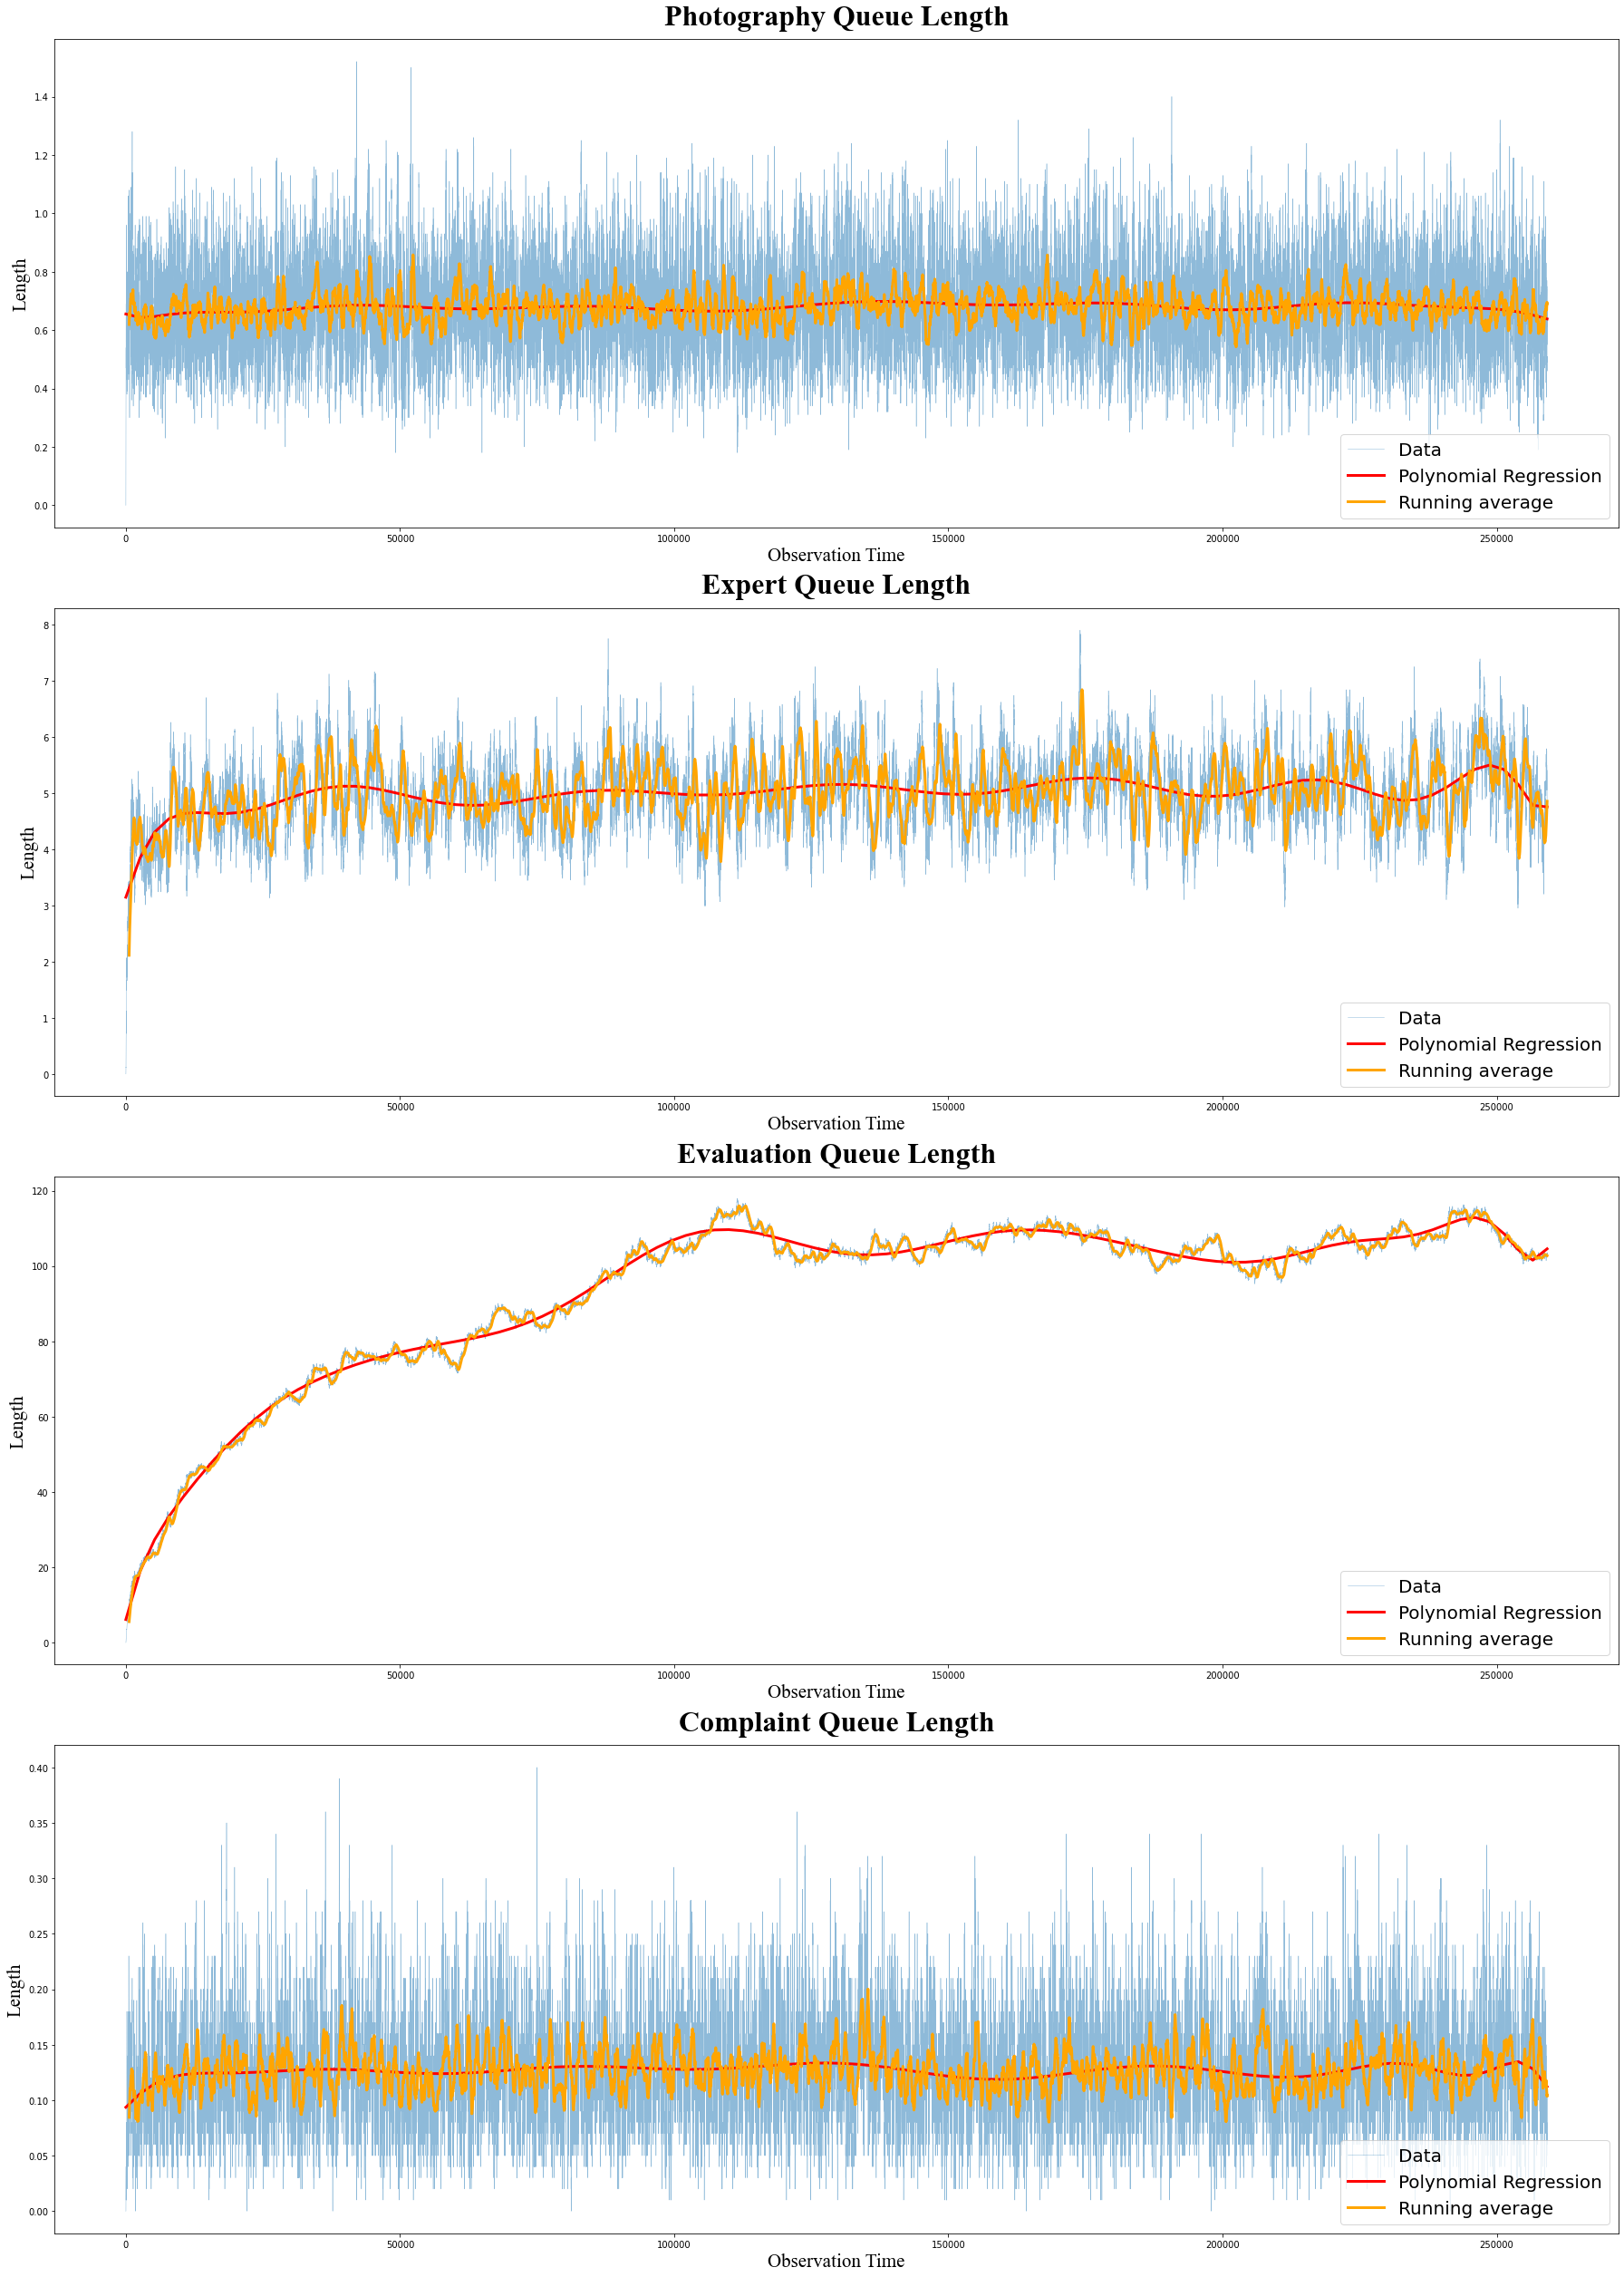

In [39]:
# Import the necessary font_manager module from matplotlib
from matplotlib import font_manager

# Set the font family to 'Times New Roman'
font_family = 'Times New Roman'

# Set the font properties using the chosen font family
font_props = font_manager.FontProperties(family=font_family)

# Fit a polynomial regression curve of degree 50 to the data points for each queue length
# Fit polynomial regression curves for the other queue lengths (Photographer, Expert, Evaluation, Complaint)
degree = 50
coeffs_photography = np.polyfit(result_df['Observation Time'], result_df['Photography Queue Length'], degree)
poly_photography = np.poly1d(coeffs_photography)

coeffs_expert = np.polyfit(result_df['Observation Time'], result_df['Expert Queue Length'], degree)
poly_expert = np.poly1d(coeffs_expert)

coeffs_evaluation = np.polyfit(result_df['Observation Time'], result_df['Evaluation Queue Length'], degree)
poly_evaluation = np.poly1d(coeffs_evaluation)

coeffs_complaint = np.polyfit(result_df['Observation Time'], result_df['Complaint Queue Length'], degree)
poly_complaint = np.poly1d(coeffs_complaint)

# Create a figure and subplots with a 4-row and 1-column layout, and custom size (25x35)
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(25, 35))

# Create a set of x values for the polynomial regression lines
x_regression = np.linspace(result_df['Observation Time'].min(), result_df['Observation Time'].max(), 100)

# Plot 1 (Photography Queue Length)

# Plot the data points for Photography Queue Length
axes[0].plot(result_df['Observation Time'], result_df['Photography Queue Length'], linewidth=0.5, alpha=0.5, label='Data')

# Plot the polynomial regression line for Photography Queue Length
axes[0].plot(x_regression, poly_photography(x_regression), color='red', linewidth=3, label='Polynomial Regression')

# Calculate the running average for Photography Queue Length
window = 300
average_y = []
for ind in range(len(result_df['Photography Queue Length']) - window + 1):
    average_y.append(np.mean(result_df['Photography Queue Length'][ind:ind+window]))
for ind in range(window - 1):
    average_y.insert(0, np.nan)

# Plot the running average line for Photography Queue Length
axes[0].plot(result_df['Observation Time'], average_y, color='orange', linewidth=3, label='Running average')

# Set the title, font properties, and other attributes for the first subplot
axes[0].set_title('Photography Queue Length', fontproperties=font_props, fontsize=32, weight='bold', pad=16)

# Plot 2 (Expert Queue Length)

# Plot the data points for Expert Queue Length
axes[1].plot(result_df['Observation Time'], result_df['Expert Queue Length'], linewidth = 0.5, alpha = 0.5, label='Data')

# Plot the polynomial regression line for Expert Queue Length
axes[1].plot(x_regression, poly_expert(x_regression), color='red', linewidth = 3, label='Polynomial Regression')

# Calculate the running average for Expert Queue Length
window = 300
average_y = []
for ind in range(len(result_df['Expert Queue Length']) - window + 1):
    average_y.append(np.mean(result_df['Expert Queue Length'][ind:ind+window]))

for ind in range(window - 1):
    average_y.insert(0, np.nan)

# Plot the running average line for Expert Queue Length
axes[1].plot(result_df['Observation Time'], average_y, color = 'orange', linewidth = 3, label='Running average')

# Set the title, font properties, and other attributes for the second subplot
axes[1].set_title('Expert Queue Length', fontproperties=font_props, fontsize = 32, weight='bold', pad=16)

# Plot 3 (Evaluation Queue Length)

# Plot the data points for Evaluation Queue Length
axes[2].plot(result_df['Observation Time'], result_df['Evaluation Queue Length'], linewidth = 0.5, alpha = 0.5, label='Data')

# Plot the polynomial regression line for Evaluation Queue Length
axes[2].plot(x_regression, poly_evaluation(x_regression), color='red', linewidth = 3, label='Polynomial Regression')

# Calculate the running average for Evaluation Queue Length
window = 300
average_y = []
for ind in range(len(result_df['Evaluation Queue Length']) - window + 1):
    average_y.append(np.mean(result_df['Evaluation Queue Length'][ind:ind+window]))

for ind in range(window - 1):
    average_y.insert(0, np.nan)

# Plot the running average line for Evaluation Queue Length
axes[2].plot(result_df['Observation Time'], average_y, color = 'orange', linewidth = 3, label='Running average')

# Set the title, font properties, and other attributes for the third subplot
axes[2].set_title('Evaluation Queue Length', fontproperties=font_props, fontsize = 32, weight='bold', pad=16)


# Plot 4 (Complaint Queue Length)

# Plot the data points for Complaint Queue Length
axes[3].plot(result_df['Observation Time'], result_df['Complaint Queue Length'], linewidth = 0.5, alpha = 0.5, label='Data')

# Plot the polynomial regression line for Complaint Queue Length
axes[3].plot(x_regression, poly_complaint(x_regression), color='red', linewidth = 3, label='Polynomial Regression')

# Calculate the running average for Complaint Queue Length
window = 300
average_y = []
for ind in range(len(result_df['Complaint Queue Length']) - window + 1):
    average_y.append(np.mean(result_df['Complaint Queue Length'][ind:ind+window]))

for ind in range(window - 1):
    average_y.insert(0, np.nan)

# Plot the running average line for Complaint Queue Length
axes[3].plot(result_df['Observation Time'], average_y, color = 'orange', linewidth = 3, label='Running average')

# Set the title, font properties, and other attributes for the fourth subplot
axes[3].set_title('Complaint Queue Length', fontproperties=font_props, fontsize = 32, weight='bold', pad=16)


# Set font properties for all labels and ticks
for ax in axes.flatten():
    ax.legend(loc='lower right', fontsize = 20)
    ax.set_xlabel('Observation Time', fontproperties=font_props, fontsize = 21)
    ax.set_ylabel('Length', fontproperties=font_props, fontsize = 21)
    ax.tick_params(axis='both', labelsize=10, labelrotation=0)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

<span style="font-family: Times New Roman; font-size: 13pt;">

The code below prompts the user to input a truncation point, which is an integer value used for further analysis based on their observations from the charts. The input value is stored in the variable `truncation_point` for later use in the program.

<span>

In [40]:
# Prompt the user to enter a truncation point based on the observed charts
truncation_point = int(input('Please Provide a Truncation Point Based on the Charts:'))

<span style="font-family: Times New Roman; font-size: 13pt;">

The following code block computes various metrics and statistics for each replication of a simulation run. The purpose is to analyze and compare the performance of the simulated system under different conditions or scenarios. Let's break down the code step by step:

1. `list_of_replication = []`: This creates an empty list called `list_of_replication`, which will be used to store replication attributes for each simulation run. Each element in this list represents a replication, and the attributes for each replication will be stored in a nested list.

2. `for i in range(len(list_of_data)):`: This `for` loop iterates over each replication's data and measures. The `list_of_data` contains the raw data for each replication, and `list_of_measures` contains computed measures obtained from the simulation results.

3. `replication_attributes = [None] * 34`: This initializes a list called `replication_attributes` with 34 `None` values. The number 34 corresponds to the number of attributes being computed for each replication.

4. `list_of_replication.append(replication_attributes)`: This adds the `replication_attributes` list to `list_of_replication`, effectively creating a new empty entry to store the attributes for the current replication.

5. `data = list_of_data[i].loc[list_of_data[i]['1. Car Arrival'] > truncation_point]`: This line extracts the relevant data for the current replication. It filters the original data using a condition where the 'Car Arrival' is greater than a `truncation_point`, which is the observed warm-up period, and data beyond this point is used for analysis. By doing this we make sure that only the data from our warm-up period is going to be used for the analysis, making it more reliable and robust. 

6. `measure = list_of_measures[i].iloc[truncation_point+1:,:]`: This line extracts the relevant measures for the current replication. It selects rows from the computed measures starting from `truncation_point+1` until the end of the measures. By doing this we make sure that only the data from our warm-up period is going to be used for the analysis, making it more reliable and robust. 

From here on, the code calculates various metrics and statistics for the current replication and stores them in the `list_of_replication` for further analysis or reporting. These statistics include:
- Mean time spent by cars in the system (element 0).
- Probability of the queues being empty (elements 1 to 5).
- Efficiency of photographers, experts, evaluation experts, and complaint experts (elements 6 to 9).
- Mean and maximum time spent in different queues (elements 10 to 19).
- Mean and maximum queue lengths (elements 20 to 33).

The calculated metrics and statistics will be available for each replication in the `list_of_replication`, allowing further analysis and comparison of the system's performance under different simulation runs.

<span>

In [41]:
list_of_replication = [] # Create an empty list to store replication attributes for each simulation run

# Loop through each replication's data and measures
for i in range(len(list_of_data)):

    replication_attributes = [None] * 34 # Initialize a list of 34 elements to store various replication attributes
    list_of_replication.append(replication_attributes) # Add the replication attribute list to the list_of_replication

    # Extract relevant data and measures for the current replication (data and measures after the warm-up period)
    data = list_of_data[i].loc[list_of_data[i]['1. Car Arrival'] > truncation_point]
    measure = list_of_measures[i].iloc[truncation_point+1:,:]

   # Calculate the mean time spent by cars in the system for the current replication
    mean_car_duration = np.mean(data['27. Time Spent in System'])
    list_of_replication[i][0] = mean_car_duration

    # Calculate the probability of the photo queue being empty for the current replication
    photo_probability = list(measure['Photography Queue Length']).count(0) / len(measure['Photography Queue Length'])
    list_of_replication[i][1] = photo_probability

    # Calculate the probability of the outside queue being empty for the current replication
    outside_probability = list(measure['Outside Queue Length']).count(0) / len(measure['Outside Queue Length'])
    list_of_replication[i][2] = outside_probability

    # Calculate the probability of the expert queue being empty for the current replication
    expert_probability = list(measure['Expert Queue Length']).count(0) / len(measure['Expert Queue Length'])
    list_of_replication[i][3] = expert_probability

    # Calculate the probability of the evaluation queue being empty for the current replication
    evaluation_probability = list(measure['Evaluation Queue Length']).count(0) / len(measure['Evaluation Queue Length'])
    list_of_replication[i][4] = evaluation_probability

    # Calculate the probability of the complaint queue being empty for the current replication
    complaint_probability = list(measure['Complaint Queue Length']).count(0) / len(measure['Complaint Queue Length'])
    list_of_replication[i][5] = complaint_probability
    

    # Calculate the efficiency of photographers for the current replication
    photographer_efficiency = sum(list(measure['Photographer Usage'])) / (num_photographers * len(measure['Photographer Usage']))
    list_of_replication[i][6] = photographer_efficiency

    # Calculate the efficiency of experts for the current replication
    expert_efficiency = sum(list(measure['Expert Usage'])) / (num_experts * len(measure['Expert Usage']))
    list_of_replication[i][7] = expert_efficiency

    # Calculate the efficiency of evaluation experts for the current replication
    evaluation_efficiency = sum(list(measure['Evaluation Usage'])) / (num_evaluation_experts * len(measure['Evaluation Usage']))
    list_of_replication[i][8] = evaluation_efficiency

    # Calculate the efficiency of complaint experts for the current replication
    complaint_efficiency = sum(list(measure['Complaint Usage'])) / (num_complaint_experts * len(measure['Complaint Usage']))
    list_of_replication[i][9] = complaint_efficiency

    # Calculate the average time spent in the photography queue for the current replication
    mean_photography_queue_time = np.mean(data['4. Time in Queue for Photography'])
    list_of_replication[i][10] = mean_photography_queue_time

    # Calculate the average time spent in the documentation queue for the current replication
    mean_documentation_queue_time = np.mean(data['8. Time in Queue for Documentation'])
    list_of_replication[i][11] = mean_documentation_queue_time

    # Calculate the average time spent in the evaluation queue for the current replication
    mean_evaluation_queue_time = np.mean(data['12. Time in Queue for Evaluation'])
    list_of_replication[i][12] = mean_evaluation_queue_time

    # Calculate the average time spent in the complaint queue for the current replication
    mean_complaint_queue_time = np.mean(data['16. Time in Queue for Complaint'])
    list_of_replication[i][13] = mean_complaint_queue_time

    # Calculate the average time spent in the fulfillment queue for the current replication
    mean_fulfillment_queue_time = np.mean(data['24. Time in Queue for Fulfillment'])
    list_of_replication[i][14] = mean_fulfillment_queue_time

    # Calculate the maximum time spent in the photography queue for the current replication
    max_photography_queue_time = np.max(data['4. Time in Queue for Photography'])
    list_of_replication[i][15] = max_photography_queue_time

    # Calculate the maximum time spent in the documentation queue for the current replication
    max_documentation_queue_time = np.max(data['8. Time in Queue for Documentation'])
    list_of_replication[i][16] = max_documentation_queue_time

    # Calculate the maximum time spent in the evaluation queue for the current replication
    max_evaluation_queue_time = np.max(data['12. Time in Queue for Evaluation'])
    list_of_replication[i][17] = max_evaluation_queue_time

    # Calculate the maximum time spent in the complaint queue for the current replication
    max_complaint_queue_time = np.max(data['16. Time in Queue for Complaint'])
    list_of_replication[i][18] = max_complaint_queue_time

    # Calculate the maximum time spent in the fulfillment queue for the current replication
    max_fulfillment_queue_time = np.max(data['24. Time in Queue for Fulfillment'])
    list_of_replication[i][19] = max_fulfillment_queue_time

    # Calculate the average length of the photography queue for the current replication
    mean_photography_queue_length = np.mean(list(measure['Photography Queue Length']))
    list_of_replication[i][20] = mean_photography_queue_length

    # Calculate the average length of the outside queue for the current replication
    mean_outside_queue_length = np.mean(list(measure['Outside Queue Length']))
    list_of_replication[i][21] = mean_outside_queue_length

    # Calculate the average length of the documentation queue for the current replication
    mean_documentation_queue_length = np.mean(list(measure['Documentation Queue Length']))
    list_of_replication[i][22] = mean_documentation_queue_length

    # Calculate the average length of the evaluation queue for the current replication
    mean_evaluation_queue_length = np.mean(list(measure['Evaluation Queue Length']))
    list_of_replication[i][23] = mean_evaluation_queue_length

    # Calculate the average length of the complaint queue for the current replication
    mean_complaint_queue_length = np.mean(list(measure['Complaint Queue Length']))
    list_of_replication[i][24] = mean_complaint_queue_length

    # Calculate the average length of the fulfillment queue for the current replication
    mean_fulfillment_queue_length = np.mean(list(measure['Fulfillment Queue Length']))
    list_of_replication[i][25] = mean_fulfillment_queue_length

    # Calculate the average length of the expert queue for the current replication
    mean_expert_queue_length = np.mean(list(measure['Expert Queue Length']))
    list_of_replication[i][26] = mean_expert_queue_length


    # Calculate the maximum length of the photography queue for the current replication
    max_photography_queue_length = np.max(list(measure['Photography Queue Length'])) 
    list_of_replication[i][27] = max_photography_queue_length  

    # Calculate the maximum length of the outside queue for the current replication
    max_outside_queue_length = np.max(list(measure['Outside Queue Length']))
    list_of_replication[i][28] = max_outside_queue_length 

    # Calculate the maximum length of the documentation queue for the current replication
    max_documentation_queue_length = np.max(list(measure['Documentation Queue Length']))  
    list_of_replication[i][29] = max_documentation_queue_length  

    # Calculate the maximum length of the evaluation queue for the current replication
    max_evaluation_queue_length = np.max(list(measure['Evaluation Queue Length']))
    list_of_replication[i][30] = max_evaluation_queue_length 

    # Calculate the maximum length of the complaint queue for the current replication
    max_complaint_queue_length = np.max(list(measure['Complaint Queue Length'])) 
    list_of_replication[i][31] = max_complaint_queue_length 

    # Calculate the maximum length of the fulfillment queue for the current replication
    max_fulfillment_queue_length = np.max(list(measure['Fulfillment Queue Length'])) 
    list_of_replication[i][32] = max_fulfillment_queue_length 

    # Calculate the maximum length of the expert queue for the current replication
    max_expert_queue_length = np.max(list(measure['Expert Queue Length'])) 
    list_of_replication[i][33] = max_expert_queue_length 


<span style="font-family: Times New Roman; font-size: 13pt;">

The block of code below performs statistical analysis on the simulation data stored in the 'replication_data' DataFrame. It calculates confidence intervals, point estimates (averages), and variances for each column in the DataFrame and creates a summary report with this information. The purpose is to assess the uncertainty and variability of the simulation results and generate insights for decision-making. The summary report is then saved to a CSV file. This file and its data will be used later to compare this system with the alternative. 
Let's break down the code step-by-step:

1. `replication_data = pd.DataFrame(list_of_replication, columns=replication_column_names)`: Creates a pandas DataFrame named `replication_data` using the list `list_of_replication` as data and `replication_column_names` as column names.

2. `index_list = list(range(len(replication_data)))`: Creates a list `index_list` containing integer values from 0 to the length of `replication_data`.

3. `Lower_CI = []` and `Upper_CI = []`: Initializes empty lists to store lower and upper confidence intervals.

4. The loop `for i in list(replication_data.columns):` iterates over each column of the `replication_data` DataFrame.

5. The code within the loop calculates the 95% confidence interval for each column using the Student's t-distribution (`st.t.interval`). If the standard error of the mean is non-zero, the confidence interval is computed and appended to `Lower_CI` and `Upper_CI`. If the standard error of the mean is zero (due to zero variance), the mean is used as both the lower and upper confidence interval.

6. After calculating the confidence intervals for all columns, `Lower_CI` and `Upper_CI` are converted into DataFrames and transposed. The column names are set to `replication_column_names`.

7. The DataFrames `Lower_CI` and `Upper_CI` are concatenated to the bottom of the original `replication_data`, effectively adding the confidence intervals to the DataFrame.

8. `point_estimate = pd.DataFrame(replication_data.iloc[:10,:].mean()).T`: Calculates the point estimates (averages) of the first 10 rows of `replication_data`, transposes the result, and stores it in the `point_estimate` DataFrame.

9. The `point_estimate` DataFrame is concatenated to the bottom of `replication_data`.

10. `variance = pd.DataFrame(replication_data.iloc[:10,:].var()).T`: Calculates the variances of the first 10 rows of `replication_data`, transposes the result, and stores it in the `variance` DataFrame.

11. The `variance` DataFrame is concatenated to the bottom of `replication_data`.

12. `index_list.extend([...])`: Extends the `index_list` by adding four new elements representing the summary labels: "Lower Confidence Interval Limit," "Upper Confidence Interval Limit," "Point Estimate (Average)," and "Variance (S^2)."

13. `index = pd.Index(index_list)`: Creates a pandas Index object named `index` using `index_list`.

14. `replication_data = replication_data.set_index(index)`: Sets the `replication_data` DataFrame's index to the `index` object, effectively using the labels as row indices.

15. `replication_data.to_csv("E:\Desktop\System 1 Output Data.csv")`: Saves the final `replication_data` DataFrame to a CSV file named "System 1 Output Data.csv" on the desktop.

In summary, the code performs statistical computations on the simulation data, including confidence intervals, point estimates, and variances, and then consolidates this information into a summary report in a pandas DataFrame format. Finally, the summarized data is saved to a CSV file for further analysis or reporting.

<span>

In [42]:
# Create a DataFrame 'replication_data' from the list_of_replication with specified column names 'replication_column_names'
replication_data = pd.DataFrame(list_of_replication, columns=replication_column_names)

# Create a list of indices corresponding to the rows in 'replication_data'
index_list = list(range(len(replication_data)))

# Initialize empty lists 'Lower_CI' and 'Upper_CI' to store lower and upper confidence intervals, respectively
Lower_CI = []
Upper_CI = []

# Loop through each column in the 'replication_data' DataFrame
for i in list(replication_data.columns):
    
    # Calculate the standard error of the mean for the current column using 'st.sem'
    if st.sem(replication_data[i]) != 0:

        # Calculate the confidence interval for the current column using 'st.t.interval' with alpha=0.95 (95% confidence level)
        confidence_interval = st.t.interval(alpha=0.95, df=len(replication_data) - 1, 
                                            loc=np.mean(replication_data[i]), 
                                            scale=st.sem(replication_data[i]))
        
        # Append the lower and upper confidence intervals to their respective lists
        Lower_CI.append(confidence_interval[0])
        Upper_CI.append(confidence_interval[1])

    else:
        # If the standard error of the mean is 0 (i.e., all values in the column are identical),
        # append the mean value as both lower and upper confidence intervals
        Lower_CI.append(np.mean(replication_data[i]))
        Upper_CI.append(np.mean(replication_data[i]))

# Create DataFrames 'Lower_CI' and 'Upper_CI' from the corresponding lists and transpose them
Lower_CI = pd.DataFrame(Lower_CI).T
Lower_CI.columns = replication_column_names

Upper_CI = pd.DataFrame(Upper_CI).T
Upper_CI.columns = replication_column_names

# Concatenate the original 'replication_data' with the lower and upper confidence interval DataFrames 'Lower_CI' and 'Upper_CI' vertically
replication_data = pd.concat([replication_data, Lower_CI, Upper_CI], axis=0)

# Calculate the point estimate (average) for each column using the first 10 rows (assuming they are replicate results)
point_estimate = pd.DataFrame(replication_data.iloc[:10, :].mean()).T

# Concatenate the 'replication_data' with the point estimate DataFrame 'point_estimate' vertically
replication_data = pd.concat([replication_data, point_estimate], axis=0)

# Calculate the variance for each column using the first 10 rows (assuming they are replicate results)
variance = pd.DataFrame(replication_data.iloc[:10, :].var()).T

# Concatenate the 'replication_data' with the variance DataFrame 'variance' vertically
replication_data = pd.concat([replication_data, variance], axis=0)

# Extend the 'index_list' with additional index labels for the confidence intervals, point estimate, and variance
index_list.extend(['Lower Confidence Interval Limit', 
                   'Upper Confidence Interval Limit',
                   'Point Estimate (Average)', 
                   'Variance (S^2)'])

# Create a pandas Index 'index' from the updated 'index_list'
index = pd.Index(index_list)

# Set the 'replication_data' DataFrame index to the newly created 'index'
replication_data = replication_data.set_index(index)

# Save the final 'replication_data' DataFrame to a CSV file named "System 1 Output Data.csv" on the desktop
replication_data.to_csv("E:\Desktop\System 1 Output Data.csv")